# LinearRegression

### 목표
- boston 데이터를 활용하여 집값을 예측해보자.

### 목차
0. 라이브러리 및 데이터 준비하기
    1. 라이브러리 불러오기
    2. 데이터 불러오기
1. 데이터 이해하기
    1. 데이터 정보 확인
    2. 데이터 분포 확인
    3. 데이터 기술통계 확인
    4. 데이터 상관관계 확인
    5. 데이터의 시각화로 확인
2. 데이터 준비하기
    1. 결측치 처리
    2. 변수 제가
    3. x, y 분리
    4. 학습용, 평가용 데이터 분리
3. 모델링
    1. 불러오기
    2. 선언하기
    3. 학습하기
    4. 예측하기
    5. 평가하기

# 0. 라이브러리 및 데이터 준비하기

기본 라이브러리와 데이터를 불러온다.

In [20]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore') # 경고 무시
%config InlineBackend.figure_format = 'retina' # 시각화 이미지 고해상도 출력하기

In [41]:
# 데이터 읽어오기
path = '../data/boston.csv'
data = pd.read_csv(path)

In [42]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**데이터 설명**

- crim: 자치시(Town)별 1인당 범죄율
- zn: 25,000 평방피트를 초과하는 거주지역 비율
- indus: 비소매상업지역이 점유하고 있는 토지 비율
- chas: 찰스강에 대한 더미 변수 (= 1 강 경계에 위치; 0 나머지)
- nox: 10ppm당 농축 일산화질소
- rm: 주택 1가구당 평균 방 개수
- age: 1940년 이전에 건축된 소유주택 비율
- dis: 5개 보스턴 직업센터까지 접근성 지수
- rad: 방사형 도로까지의 접근성 지수
- tax: 10,000달러 당 재산세율
- ptratio: 자치시(Town)별 학생/교사 비율
- black: 1000(Bk - 0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 의미
- lstat: 모집단 하위 계층의 비율(%)
- medv: 본인 소유 주택가격(중앙값) (단위:$1,000)

# 1.데이터 이해하기

데이터를 충분히 이해할 수 있도록 다양한 탐색 과정 수행한다.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


- 데이터의 결측치는 없는 것으로 확인 된다.

#### 각 데이터별, 기술통계를 확인해보자
```
data.describe().t
```

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


#### 데이터 분포를 확인해보자.
```
plt.hist()
```

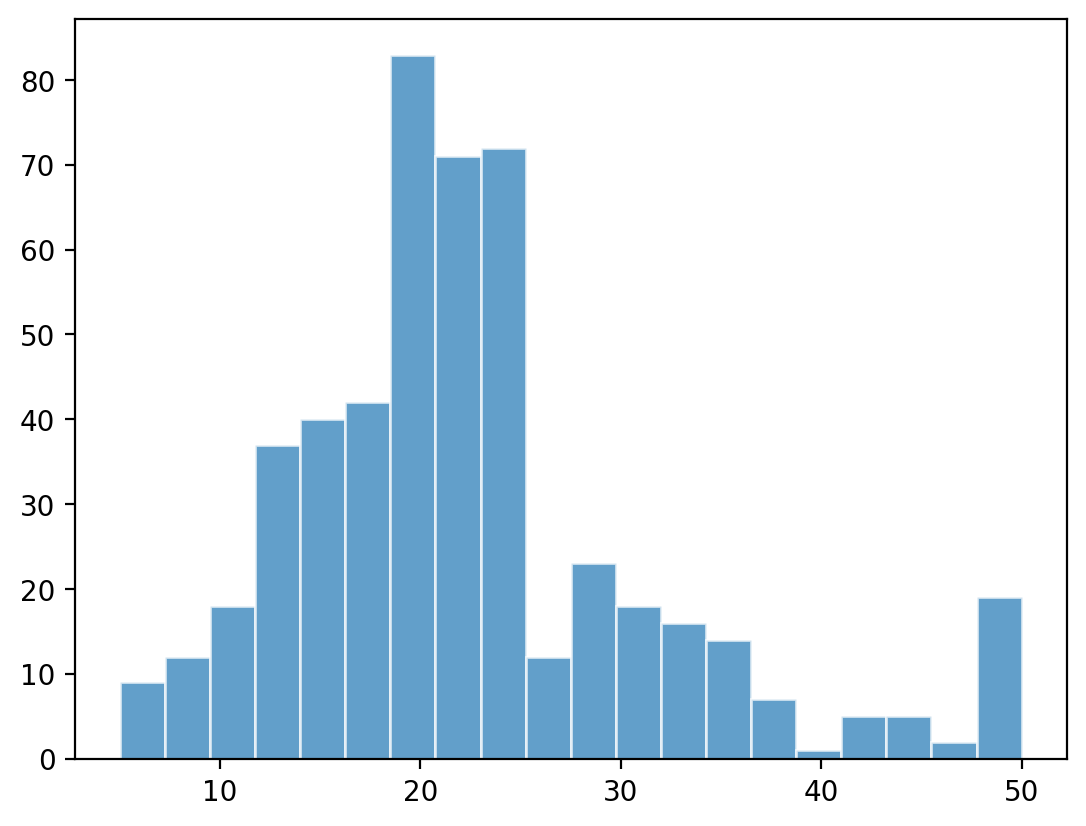

In [9]:
plt.hist(data['medv'], bins=20, alpha=0.7, ec='w')
plt.show()

#### 각 데이터별, 상관관계 확인 및 시각화 해보자
```
# 상관관계 확인
data.corr()

# 시각화
sns.heatmap(data.corr(),
           annot = True,
           cmap = 'Blues',
           fmt='.2f')
plt.show()

- annot : 글자 표시
- cmap : 색상표
- fmt : 포맷형식(숫자 얼만큼 나오게 할지)
- square : 정사각형 만들지 말지
- annot_kws : 키워드별 수정사항
```

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


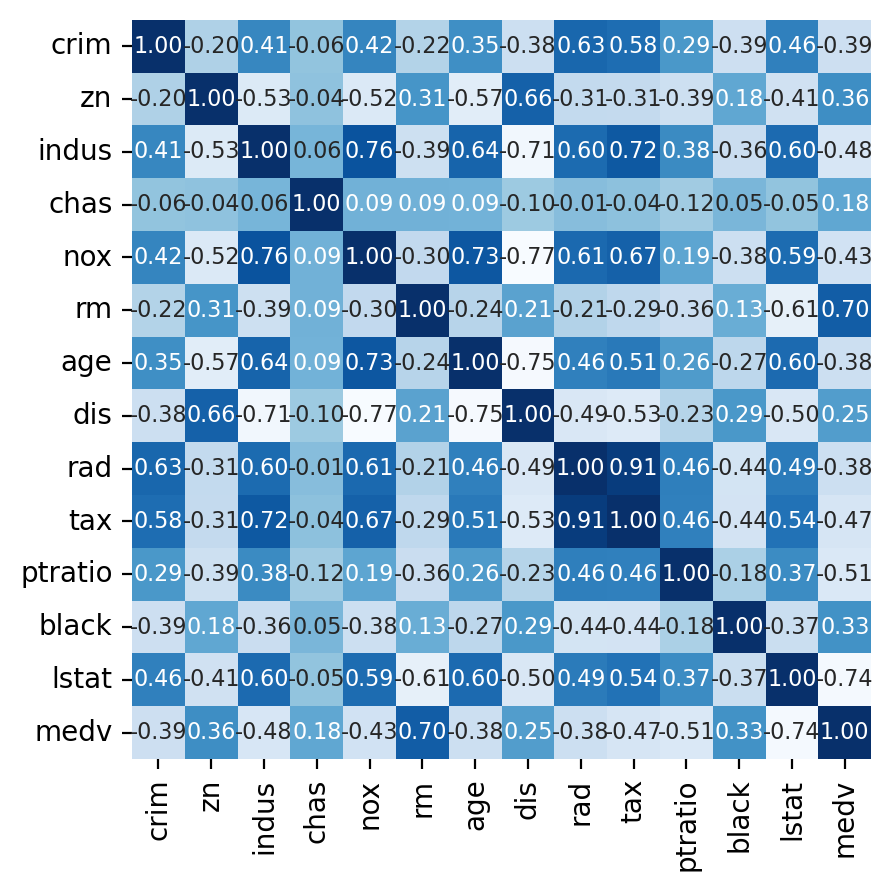

In [14]:
display(data.corr())
sns.heatmap(data.corr(),
           annot = True,
           cmap = 'Blues',
           fmt='.2f',
           cbar=False,
           square=True,
           annot_kws={'size':8})
plt.show()

#### rm --> medv
주택 1가구당 평균 방 개수가 본인 소유 주택 가격과 상관관계가 있는지 확인하기 
```
sns.regplot(x='Temp',y='Ozone',data=data)
plt.show()
```

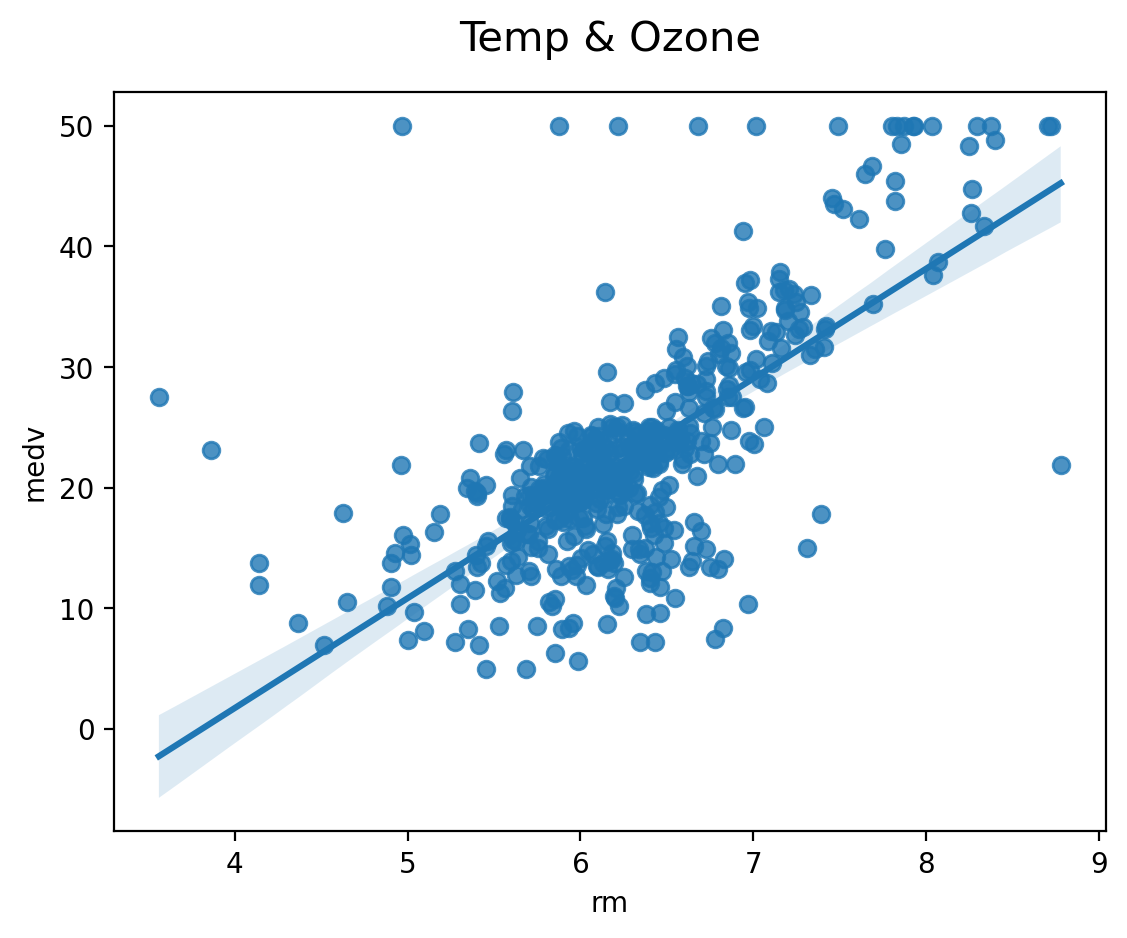

In [16]:
sns.regplot(x='rm',y='medv',data=data)
plt.title("Temp & Ozone", size=15, pad=15)
plt.show()

# 2. 데이터 준비하기
전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비한다.
1. 결측치 처리
2. 변수 제거
3. x, y 분리
4. 학습용 평가용 데이터 분리

#### 1. 결측치 처리
```
data.isna().sum() # 결측치 몇개인지 보기
data.fillna(method='ffill'm inplace=True) # 전날 값으로 결측치 채우기
```

In [17]:
data.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

#### 2. 변수 제거
```
    drop_cols=['chas','dis']
    data.drop(drop_cols, axis=1, inplace=True) # drop_cols에 해당하는 열 제거

    data.head()
```

In [23]:
# 변수 제거
# drop_cols=['chas','dis']
data.drop(drop_cols, axis=1, inplace=True) # drop_cols에 해당하는 열 제거

data.head()

,crim,zn,indus,nox,rm,age,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,3,222,18.7,396.90,5.33,36.2


#### 3. x, y 분리
- target 변수를 명확히 지정한다. : Ozone
- target을 제외한 변수를 x 데이터프레임으로 선언
- y데이터프레임은 target변수만을 가진다

In [43]:
target ='medv'

x = data.drop(target, axis=1)
y = data['medv']

display(x.head())
display(y.head())

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

#### 4. 학습용, 평가용 데이터 분리
- 학습용, 평가용 데이터를 적절한 비율로 분리한다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정한다.

In [44]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 학습용 : 테스트용을 7:3 비율로 분리한다.
# train_test_split의 경우 데이터를 섞은 후, 분리한다.
# 그렇기 때문에 random_state 설정이 없을 경우 테스트 때마다 결과값이 달라질 수 있다.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [45]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [46]:
x_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
13,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26
61,0.17171,25.0,5.13,0,0.453,5.966,93.4,6.8185,8,284,19.7,378.08,14.44
377,9.82349,0.0,18.10,0,0.671,6.794,98.8,1.3580,24,666,20.2,396.90,21.24
39,0.02763,75.0,2.95,0,0.428,6.595,21.8,5.4011,3,252,18.3,395.63,4.32
365,4.55587,0.0,18.10,0,0.718,3.561,87.9,1.6132,24,666,20.2,354.70,7.12


# 3. 모델링
모델을 **선언**하고, **학습**하고, **평가**하는 과정을 진행한다

0. 문제 구분하기 -> 회귀인지 분류인지
1. 불러오기
2. 선언하기
3. 학습하기
3. 예측하기
4. 평가하기

#### 1. 불러오기
- 알고리즘 : LinearRegression
- 평가 방법 : mean_absolute_error

In [47]:
from sklearn.linear_model import LinearRegression # 선형회귀 알고리즘
from sklearn.metrics import mean_absolute_error # 평균 절대값 오차 

#### 2. 선언하기

In [48]:
model = LinearRegression()

#### 3. 학습하기

In [49]:
model.fit(x_train, y_train)

LinearRegression()

#### 4. 예측하기

In [50]:
y_pred = model.predict(x_test)

print(y_pred[:10]) # 예측값 10개 보기
print(y_test.values[:10]) # 실제값 10개 보기

[32.3914647  27.94401279 17.83762764 21.66941388 18.93639614 20.01995795
 32.63414961 17.86179976 24.73211676 26.77346826]
[28.2 23.9 16.6 22.  20.8 23.  27.9 14.5 21.5 22.6]


#### 5. 평가하기

In [51]:
print(f"MAE : {mean_absolute_error(y_test, y_pred)}")
# 예측값에서 MAE만큼 오차가 있다는 것을 이야기함

MAE : 3.3446655035987605


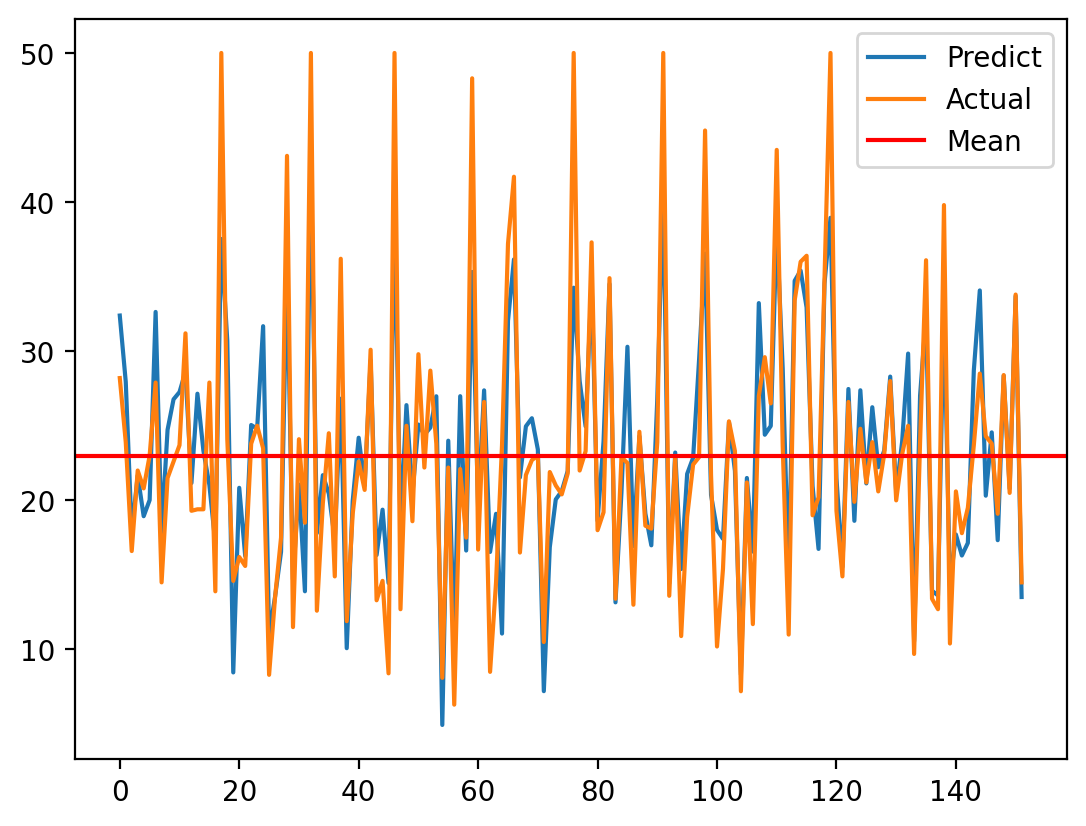

In [52]:
# 평균
mean_ozone = y_test.values.mean()

# 시각화
plt.plot(y_pred, label="Predict") # 예측값
plt.plot(y_test.values, label='Actual') # 실제값
plt.axhline(mean_ozone, color='r',label='Mean')
plt.legend()

plt.show()

In [35]:
mean_ozone = y_test.values.mean()
mean_ozone

22.982236842105262

#### 다양한 성능 지표로 회귀 모델 성능을 평가하기
1. MAE (Mean Absolute Error)
2. MSE (Mean Squared Error)
3. RMSE (Root Mean Squared Error)
4. MAPE (Mean Absolute Percentage Error)
5. R2-Score

**1) MAE(Mean Absolute Error)**


$$\large MAE=\frac{1}{n}\sum_{i=1}^{n}|y_{i}-\hat{y}_{i}|$$

In [36]:
# 모듈 불러오기
from sklearn.metrics import mean_absolute_error

# 성능 평가
print(f"MAE : {mean_absolute_error(y_test, y_pred)}")

MAE : 3.5951125260800305


**2) MSE(Mean Squared Error)**

$$\large MSE=\frac{1}{n}\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^2$$

In [37]:
# 모듈 불러오기
from sklearn.metrics import mean_squared_error

# 성능 평가
print(f"MSE : {mean_squared_error(y_test, y_pred)}")

MSE : 22.72440288226238


**3) RMSE(Root Mean Squared Error)**


$$\large RMSE=\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^2}$$

In [38]:
# 모듈 불러오기
from sklearn.metrics import mean_squared_error

# 성능 평가
print(f"RMSE : {(mean_squared_error(y_test, y_pred))**(0.5)}")

RMSE : 4.767011944841588


**4) MAPE(Mean Absolute Percentage Error)**

$$\large MAPE=\frac{1}{n}\sum_{i=1}^{n}\left |\frac{y_{i}-\hat{y}_{i}}{y_{i}}\right |$$

In [39]:
# 모듈 불러오기
from sklearn.metrics import mean_absolute_percentage_error

# 성능 평가
print(f"MAPE : {mean_absolute_percentage_error(y_test, y_pred)}")

MAPE : 0.17072889149954087


**5) R2-Score**

$$\large R^2=1-\frac{SSE}{SST}=1-\frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^2}{\sum_{i=1}^{n}(y_{i}-\bar{y}_{i})^2}$$

In [40]:
# 모듈 불러오기
from sklearn.metrics import r2_score

# 성능 평가
print(f"R2-Score : {r2_score(y_test, y_pred)}")

R2-Score : 0.7520644804108455
